--- 
# 서울시 발생 범죄와 체감 안전도 
: 강남 3구 안전도가 얼마나 되는지, 서울시 전체 안전도 얼마나 되는지 확인 

In [2]:
# data handling 
import pandas as pd 
import numpy as np 

# data vis.
import matplotlib.pyplot as plt
import seaborn as sns 
import folium

# Warning 무시 
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [70]:
# import file 
crime_anal_police = pd.read_csv("../Data/crime_in_Seoul.csv", encoding = 'euc-kr')
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170"
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070"
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711"
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861


In [58]:
crime_anal_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     object
 8   절도 검거   31 non-null     object
 9   폭력 발생   31 non-null     object
 10  폭력 검거   31 non-null     object
dtypes: int64(6), object(5)
memory usage: 2.8+ KB


In [59]:
# import file 2
police_address = pd.read_csv("../Data/SeoulPoliceAddress.csv")
police_address.head()

,경찰관서,전화번호,FAX,주소
0,서울중부경찰서,(02)2273-4400,(02)2275-3009,서울 중구 수표로 27
1,서울종로경찰서,(02)3701-4324,(02)3701-4223,서울 종로구 율곡로 46
2,서울남대문경찰서,(02)2096-8324,(02)2096-8337,서울 중구 한강대로 410
3,서울서대문경찰서,(02)335-8192,(02)335-8189,서울 서대문구 통일로 113
4,서울혜화경찰서,(02)762-4400,(02)3158-7133,서울 종로구 창경궁로 112-16


In [60]:
# crime_anal_police 관서명을 police_address의 경찰관서 이름과 똑같이 만들기 (for문 사용)
station_name = []
for name in crime_anal_police['관서명']:
    station_name.append("서울"+name[:-1]+"경찰서")

In [71]:
# for 문 없이 쓰는 방법 
station_name = list("서울"+crime_anal_police['관서명'].str[:-1]+"경찰서")

In [72]:
# 아직 적용 안하고 리스트만 만들어 둠 
station_name

['서울중부경찰서',
 '서울종로경찰서',
 '서울남대문경찰서',
 '서울서대문경찰서',
 '서울혜화경찰서',
 '서울용산경찰서',
 '서울성북경찰서',
 '서울동대문경찰서',
 '서울마포경찰서',
 '서울영등포경찰서',
 '서울성동경찰서',
 '서울동작경찰서',
 '서울광진경찰서',
 '서울서부경찰서',
 '서울강북경찰서',
 '서울금천경찰서',
 '서울중랑경찰서',
 '서울강남경찰서',
 '서울관악경찰서',
 '서울강서경찰서',
 '서울강동경찰서',
 '서울종암경찰서',
 '서울구로경찰서',
 '서울서초경찰서',
 '서울양천경찰서',
 '서울송파경찰서',
 '서울노원경찰서',
 '서울방배경찰서',
 '서울은평경찰서',
 '서울도봉경찰서',
 '서울수서경찰서']

In [69]:
# 경찰서 갯수 확인 
len(station_name)
len(police_address)

31

In [75]:
police_address.head()

,경찰관서,전화번호,FAX,주소,lng,lat
0,서울중부경찰서,(02)2273-4400,(02)2275-3009,서울 중구 수표로 27,0,0
1,서울종로경찰서,(02)3701-4324,(02)3701-4223,서울 종로구 율곡로 46,0,0
2,서울남대문경찰서,(02)2096-8324,(02)2096-8337,서울 중구 한강대로 410,0,0
3,서울서대문경찰서,(02)335-8192,(02)335-8189,서울 서대문구 통일로 113,0,0
4,서울혜화경찰서,(02)762-4400,(02)3158-7133,서울 종로구 창경궁로 112-16,0,0


In [74]:
police_address['lng'] = 0
police_address['lat'] = 0

In [78]:
# 경찰서 주소에 위도 경도 붙이기 

import urllib.request 

client_id = "apiid"
client_secret = "apipassword"

# 0번 지점은 주소를 변경해서 다시 받아와야 하기 때문에 
# 1번부터 49번까지 주소만 가져옴 
for i in range(len(police_address)):
    address = police_address['주소'][i]
    encText = urllib.parse.quote(address)
    url = "https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode?query=" + encText # JSON 
    request = urllib.request.Request(url)
    request.add_header("X-NCP-APIGW-API-KEY-ID",client_id)
    request.add_header("X-NCP-APIGW-API-KEY",client_secret)

    response = urllib.request.urlopen(request)
    rescode = response.getcode()

    if rescode == 200 :
        response_body = response.read()
        enText = response_body.decode('utf-8')
    else : 
        print("ERROR CODE :" + rescode)

    import json 
    data1 = json.loads(enText)
    #print(address, data1)
    police_address['lat'][i] = data1['addresses'][0]['y']
    police_address['lng'][i] = data1['addresses'][0]['x']

서울 중구 수표로 27 {'status': 'OK', 'meta': {'totalCount': 1, 'page': 1, 'count': 1}, 'addresses': [{'roadAddress': '서울특별시 중구 수표로 27 서울중부경찰서', 'jibunAddress': '서울특별시 중구 저동2가 62-1 서울중부경찰서', 'englishAddress': '27, Supyo-ro, Jung-gu, Seoul, Republic of Korea', 'addressElements': [{'types': ['SIDO'], 'longName': '서울특별시', 'shortName': '서울특별시', 'code': ''}, {'types': ['SIGUGUN'], 'longName': '중구', 'shortName': '중구', 'code': ''}, {'types': ['DONGMYUN'], 'longName': '저동2가', 'shortName': '저동2가', 'code': ''}, {'types': ['RI'], 'longName': '', 'shortName': '', 'code': ''}, {'types': ['ROAD_NAME'], 'longName': '수표로', 'shortName': '수표로', 'code': ''}, {'types': ['BUILDING_NUMBER'], 'longName': '27', 'shortName': '27', 'code': ''}, {'types': ['BUILDING_NAME'], 'longName': '서울중부경찰서', 'shortName': '서울중부경찰서', 'code': ''}, {'types': ['LAND_NUMBER'], 'longName': '62-1', 'shortName': '62-1', 'code': ''}, {'types': ['POSTAL_CODE'], 'longName': '04552', 'shortName': '04552', 'code': ''}], 'x': '126.9896139', 'y': 

In [79]:
police_address.head()

,경찰관서,전화번호,FAX,주소,lng,lat
0,서울중부경찰서,(02)2273-4400,(02)2275-3009,서울 중구 수표로 27,126.9896139,37.5635144
1,서울종로경찰서,(02)3701-4324,(02)3701-4223,서울 종로구 율곡로 46,126.9849292,37.5755322
2,서울남대문경찰서,(02)2096-8324,(02)2096-8337,서울 중구 한강대로 410,126.9735627,37.5548186
3,서울서대문경찰서,(02)335-8192,(02)335-8189,서울 서대문구 통일로 113,126.9667851,37.5649018
4,서울혜화경찰서,(02)762-4400,(02)3158-7133,서울 종로구 창경궁로 112-16,126.9989318,37.5718764


In [80]:
# csv로 저장해두기 
police_address.to_csv("../Data/SeoulPoliceAddress_latlng.csv", index = False)

In [81]:
# 2개의 File에 경찰관서 이름 동일한 이름인지 확인 
# - 글자와 순서 동일한 것 개수가 31개인지 확인하면 됨 ! 
len(station_name == police_address['경찰관서'])

31

In [102]:
# 경찰서의 주소에서 구를 가져와서 범죄 데이터셋에 넣기 
gunames = [address.split()[1] for address in police_address['주소']]

In [103]:
gunames

['중구',
 '종로구',
 '중구',
 '서대문구',
 '종로구',
 '용산구',
 '성북구',
 '동대문구',
 '마포구',
 '영등포구',
 '성동구',
 '동작구',
 '광진구',
 '은평구',
 '강북구',
 '관악구',
 '중랑구',
 '강남구',
 '관악구',
 '양천구',
 '강동구',
 '성북구',
 '구로구',
 '서초구',
 '양천구',
 '송파구',
 '노원구',
 '서초구',
 '은평구',
 '도봉구',
 '강남구']

In [104]:
crime_anal_police['구별'] = gunames
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170",중구
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070",종로구
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794,중구
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711",서대문구
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861,종로구


In [105]:
# 이런 로직....
gu_name = []

for name in police_address['주소']:
    temp = name.split() # 주소 공백으로 나누기 
    temp_gu = [gu for gu in temp if gu[-1] == '구'][0] # '구'로 끝나는 단어들 리스트로 넣고, 데이터만 가져오기 
    gu_name.append(temp_gu)
    
crime_anal_police['구별'] = gu_name
crime_anal_police.head()

중구
종로구
중구
서대문구
종로구
용산구
성북구
동대문구
마포구
영등포구
성동구
동작구
광진구
은평구
강북구
관악구
중랑구
강남구
관악구
양천구
강동구
성북구
구로구
서초구
양천구
송파구
노원구
서초구
은평구
도봉구
강남구


In [109]:
# list의 중복값 확인 
# gunames에 중복값이 없는지 확인 
# - unique()는 df만 쓰니까 
len(set(gunames)) # 집햡으로 하면 디폴트로 중복값 제거하고 보여줌. 

23

> 구가 23개인게 이상함 

In [111]:
# 관서명과 구별 이름 확인 
crime_anal_police.loc[:,['관서명','구별']]

,관서명,구별
0,중부서,중구
1,종로서,종로구
2,남대문서,중구
3,서대문서,서대문구
4,혜화서,종로구
5,용산서,용산구
6,성북서,성북구
7,동대문서,동대문구
8,마포서,마포구
9,영등포서,영등포구


In [125]:
# DataSet를 보면 금천서가 관악구로 편성, 현재 금천서는 금천구로 편성되어 있음 -> 바꿔줘야 한다

crime_anal_police.loc[crime_anal_police['관서명'] == '금천서',['구별']] = '금천구'

In [127]:
# DataSet를 보면 강서서가 양천구로 편성, 현재 강서서는 강서구로 편성 -> 변경하기 
crime_anal_police.loc[crime_anal_police['관서명'] == '강서서',['구별']] = '강서구'

In [128]:
# 확인 
crime_anal_police[crime_anal_police['관서명'] == '금천서']

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
15,금천서,3,4,6,6,151,122,"1,567",888,"2,054","1,776",금천구


In [129]:
# 확인 
crime_anal_police[crime_anal_police['관서명'] == '강서서']

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
19,강서서,7,8,13,13,262,191,"2,096","1,260","3,207","2,718",강서구


In [130]:
# 확인 
len(crime_anal_police['구별'].unique())

25

In [131]:
# 저장 (데이터 정제가 어느정도 되면 저장 꼭)
crime_anal_police.to_csv("../Data/Seoul_crime_include_gu_name.csv", index=False)

> 분석하려는 것이 구별 안전이니까 관서명으로 데이터를 정리하는 것이 아니고 구별로 데이터를 정리하자 

In [132]:
len(crime_anal_police)

31

> 구는 25개인데, 한 구에 경찰서가 여러개 있는 곳도 있어서 합쳐야 함 

In [43]:
crime_anal_police = pd.read_csv("../Data/Seoul_crime_include_gu_name.csv")

In [44]:
# 구별로 데이터 정리 하기 
crime_anal_police.head()


,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170",중구
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070",종로구
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794,중구
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711",서대문구
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861,종로구


In [45]:
# 숫자 아닌 컬럼들 숫자로 바꾸기 
crime_anal_police.loc[:,'절도 발생']= crime_anal_police.loc[:,'절도 발생'].str.replace(",","").astype(int)
crime_anal_police.loc[:,'절도 검거']=crime_anal_police.loc[:,'절도 검거'].str.replace(",","").astype(int)
crime_anal_police.loc[:,'폭력 발생']=crime_anal_police.loc[:,'폭력 발생'].str.replace(",","").astype(int)
crime_anal_police.loc[:,'폭력 검거']=crime_anal_police.loc[:,'폭력 검거'].str.replace(",","").astype(int)

In [46]:
crime_anal_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     int64 
 8   절도 검거   31 non-null     int64 
 9   폭력 발생   31 non-null     int64 
 10  폭력 검거   31 non-null     int64 
 11  구별      31 non-null     object
dtypes: int64(10), object(2)
memory usage: 3.0+ KB


In [47]:
crime_anal = pd.pivot_table(crime_anal_police, index='구별', aggfunc=np.sum)
crime_anal.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284
강동구,123,156,8,6,3,4,789,2366,2248,2712
강북구,126,153,13,14,8,7,618,1434,2348,2649
강서구,191,262,13,13,8,7,1260,2096,2718,3207
관악구,221,320,14,12,8,9,827,2706,2642,3298


In [48]:
# 강간, 강도, 살인, 절도, 폭력 검거율 컬럼 만들기 
crime_anal['강간검거율'] = crime_anal['강간 검거']/crime_anal['강간 발생'] * 100
crime_anal['강도검거율'] = crime_anal['강도 검거']/crime_anal['강도 발생'] * 100
crime_anal['살인검거율'] = crime_anal['살인 검거']/crime_anal['살인 발생'] * 100
crime_anal['절도검거율'] = crime_anal['절도 검거']/crime_anal['절도 발생'] * 100
crime_anal['폭력검거율'] = crime_anal['폭력 검거']/crime_anal['폭력 발생'] * 100

In [49]:
crime_anal.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,123,156,8,6,3,4,789,2366,2248,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,126,153,13,14,8,7,618,1434,2348,2649,82.352941,92.857143,114.285714,43.096234,88.637222
강서구,191,262,13,13,8,7,1260,2096,2718,3207,72.900763,100.000000,114.285714,60.114504,84.752105
관악구,221,320,14,12,8,9,827,2706,2642,3298,69.062500,116.666667,88.888889,30.561715,80.109157


In [50]:
# 검거 건수는 삭제 하기 
del crime_anal['강간 검거']
del crime_anal['강도 검거']
del crime_anal['살인 검거']
del crime_anal['절도 검거']
del crime_anal['폭력 검거']

crime_anal

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,114.285714,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,116.666667,88.888889,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,185.714286,100.000000,42.200925,83.047619
구로구,281,15,8,2335,3007,58.362989,73.333333,75.000000,38.072805,80.877951
금천구,151,6,3,1567,2054,80.794702,100.000000,133.333333,56.668794,86.465433
노원구,197,7,10,2193,2723,61.421320,100.000000,100.000000,36.525308,85.530665


> 100 넘는 데이터 : 전년도 발생한 사건의 검거 건수도 포함되어서 검거율 100 넘는 곳이 발생 

In [51]:
crime_anal.head()


,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,114.285714,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,116.666667,88.888889,30.561715,80.109157


In [56]:
# 검거율이 100 넘는 경우에는 100으로 변경한다 
# - 방법1) 컬럼이 연속으로 있으면 이게 편함 
crime_anal[crime_anal.iloc[:,5:] > 100] = 100

In [59]:
# - 방법2) for 문 사용 (컬럼이 띄엄 있거나 하면 for문이 좋음)
updateList = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']

for upd in updateList :
    crime_anal.loc[crime_anal[upd] > 100, [upd]] = 100 

# - 방법 3) 컬럼 몇 개 없으면 저 for문 안에 있는거 직접 이름 쓰고 여러줄 복사해서 쓰기 

In [60]:
crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157


In [62]:
# Column 이름 변경하기 

crime_anal.rename(columns={'강간 발생':'강간','강도 발생':'강도','살인 발생':'살인','폭력 발생':'폭력','절도 발생':'절도'}, inplace=True)
crime_anal.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157


--- 
### 데이터의 정규화 (Normalization)
: 강도, 살인은 2자리수, 강간은 3자리수, 절도, 폭력은 4자리수      
: 각 항목별 건수를 비슷한 범위에 놓고 비교하는 것이 편리      
: 각 항목의 값을 최대 1로 계산하여 비중으로 분석하는 것이 좋음      

In [63]:
# 머신러닝 모듈 사용하기 
# sklean의 preprocessing 기능 사용하여 최대값과 최소값을 비교하면서 정규화 진행 

from sklearn import preprocessing


In [64]:
# 정규화할 컬럼 지정 
col = ['강간','강도','살인','절도','폭력']

In [65]:
# 정규화 진행할 컬럼의 데이터 설정 
x = crime_anal[col].values
x
# - 가로, 세로 df이니까 2차원 배열로 나옴 

array([[ 449,   21,   13, 3850, 4284],
       [ 156,    6,    4, 2366, 2712],
       [ 153,   14,    7, 1434, 2649],
       [ 262,   13,    7, 2096, 3207],
       [ 320,   12,    9, 2706, 3298],
       [ 240,   14,    4, 3026, 2625],
       [ 281,   15,    8, 2335, 3007],
       [ 151,    6,    3, 1567, 2054],
       [ 197,    7,   10, 2193, 2723],
       [ 102,    9,    3, 1063, 1487],
       [ 173,   13,    5, 1981, 2548],
       [ 285,    9,    5, 1865, 1910],
       [ 294,   14,    8, 2555, 2983],
       [ 154,    5,    2, 1812, 2056],
       [ 393,    9,    8, 2635, 2399],
       [ 126,    9,    4, 1607, 1612],
       [ 150,    5,    5, 1785, 2209],
       [ 220,   13,   11, 3239, 3295],
       [ 120,    6,    3, 1890, 2509],
       [ 295,   22,   14, 2964, 3572],
       [ 194,   14,    5, 1557, 2050],
       [ 166,    9,    3, 1914, 2653],
       [ 211,   11,    6, 2184, 2293],
       [ 170,    9,    3, 2548, 2224],
       [ 187,   11,   13, 2135, 2847]])

In [66]:
# 최대값, 최소값 가져오기 
# - 생성자 만듦 
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler

MinMaxScaler()

In [67]:
# 정규화 시킬 최종 값은 비율로 계산되기 때문에 float 설정 
x_scaled = min_max_scaler.fit_transform(x.astype(float))
x_scaled

array([[1.        , 0.94117647, 0.91666667, 1.        , 1.        ],
       [0.1556196 , 0.05882353, 0.16666667, 0.46752781, 0.43796925],
       [0.14697406, 0.52941176, 0.41666667, 0.13311805, 0.41544512],
       [0.4610951 , 0.47058824, 0.41666667, 0.37064944, 0.61494458],
       [0.62824207, 0.41176471, 0.58333333, 0.58952278, 0.64747944],
       [0.39769452, 0.52941176, 0.16666667, 0.70434159, 0.4068645 ],
       [0.51585014, 0.58823529, 0.5       , 0.45640474, 0.5434394 ],
       [0.14121037, 0.05882353, 0.08333333, 0.18083961, 0.2027172 ],
       [0.27377522, 0.11764706, 0.66666667, 0.40545389, 0.44190204],
       [0.        , 0.23529412, 0.08333333, 0.        , 0.        ],
       [0.20461095, 0.47058824, 0.25      , 0.32938644, 0.379335  ],
       [0.52737752, 0.23529412, 0.25      , 0.28776462, 0.15123346],
       [0.55331412, 0.52941176, 0.5       , 0.53534266, 0.53485878],
       [0.14985591, 0.        , 0.        , 0.26874776, 0.20343225],
       [0.83861671, 0.23529412, 0.

In [68]:
# 정규화된 범죄건수가 있는 새로운 DF 만들기 
crime_anal_norm = pd.DataFrame(x_scaled, columns=col, index=crime_anal.index)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력
구별,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000
강동구,0.155620,0.058824,0.166667,0.467528,0.437969
강북구,0.146974,0.529412,0.416667,0.133118,0.415445
강서구,0.461095,0.470588,0.416667,0.370649,0.614945
관악구,0.628242,0.411765,0.583333,0.589523,0.647479


In [69]:
# 검거율 갖다 붙이기 
col2 = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
crime_anal_norm[col2] = crime_anal[col2]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157


--- 
### cctv 데이터와 합치기 
: 구별 cctv 수와 인구수를 가져와서 범죄율과 얼마나 상관있는지 확인 

In [70]:
result_CCTV = pd.read_csv("../Data/CCTV_Result.csv", index_col='구별')
result_CCTV.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812
강동구,1879,82.960078,457042,452646,4396,66401,0.961837,14.528424
강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328


In [71]:
# 인구수와 소계 컬럼 추가하기 
crime_anal_norm[['인구수','CCTV',]] = result_CCTV[['인구수','소계']]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,549898,5221
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,457042,1879
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,316750,1265
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,595703,1617
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,516662,3985


In [76]:
# 정규화된 범죄 발생건수를 합하여 범죄 컬럼 생성하기 
# - 만약에 컬럼 떨어져 있으면 컬러 이름 리스트 만들어서 하면 됨 
crime_anal_norm['범죄'] = crime_anal_norm.loc[:,'강간':'폭력'].sum(axis=1)

In [77]:
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,549898,5221,4.857843
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,457042,1879,1.286607
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,316750,1265,1.641616
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,595703,1617,2.333944
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,516662,3985,2.860342


In [78]:
# 검거율 통합하여 컬럼 생성하기 
crime_anal_norm['검거'] = crime_anal_norm.loc[:,'강간검거율':'폭력검거율'].sum(axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,549898,5221,4.857843,369.707384
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,457042,1879,1.286607,370.084431
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,316750,1265,1.641616,406.943540
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,595703,1617,2.333944,417.767372
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,516662,3985,2.860342,368.622261


--- 
## Seaborn 활용한 시각화 

### 5개 범죄 건수에 대한 상관관계 시각화 


In [ ]:

sns.pairplot(
    crime_anal_norm,
    vars = ['강간','강도','살인','폭력','절도'],
    kind = 'reg',

)
plt.show()

> 5대 범죄 모두 양의 상관관계     
> 예를 들어 강도의 건수가 많아지면 폭력과 살인의 발생건수도 많아진다 

### CCTV와 살인, 강도에 대한 그래프 


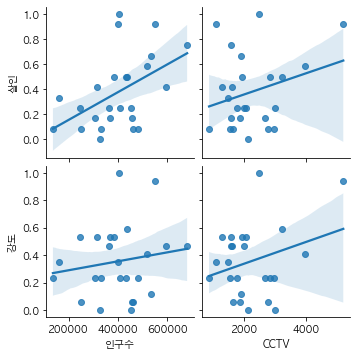

In [81]:
sns.pairplot(
    crime_anal_norm,
    x_vars=['인구수','CCTV'],
    y_vars=['살인','강도'],
    kind = 'reg'
)
plt.show()

> 인구수가 증가하면 강도와 살인 발생 수도 증가한다     
> 특히, 강도 보다는 살인 발생수가 훨씬 많이 증가한다     
> CCTV와 살인은 상관관계가 있으나 강도에 비해 낮게 보인다    
> 따라서 CCTV가 없을 때 살인 사건 발생수가 증가한다     
 

### 인구수, CCTV와 살인검거율, 폭력검거율 그래프 


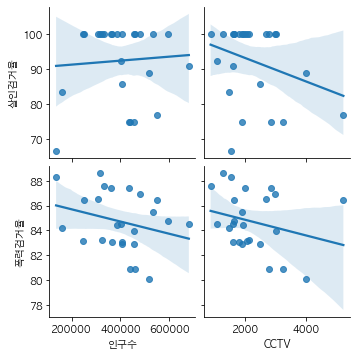

In [82]:
sns.pairplot(
    crime_anal_norm,
    x_vars=['인구수','CCTV'],
    y_vars=['살인검거율','폭력검거율'],
    kind = 'reg'
)
plt.show()

> 인구수가 증가하면 폭력검거율이 감소하는 역상관을 보인다.         
> 인구수와 살인검거율간 상관관계는 매우 약해 보인다.     
> CCTV와 살인, 폭력 검거율간 관계는 역상관관계를 보인다. 즉, CCTV가 증가할수록 폭력, 살인 검거율이 감소하는 경향이 있다.        
> 특히, 살인검거율에 있어서는 강한 역상관을 보인다.

> CCTV 대수가 낮은 곳은 애초에 살인 발생수가 많기 때문에 몇 개 검거를 못한다 하더라도 검거율이 확떨어지지 않는다.      
> 많은 곳은 발생수가 적으니까 몇 개 검거를 못하면 검거율이 떨어진다. 


---
## heatmap을 이용한 전체 검거율 확인 

In [83]:
# 검거 최대값 가져오기 
tmp_max = crime_anal_norm['검거'].max()

# 검거의 최대값을 100으로 설정하고 검거율 계산하기 
crime_anal_norm['검거'] = crime_anal_norm['검거'] / 100 

# 검거율을 기준으로 정렬하기 
crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', ascending=False)
crime_anal_norm_sort.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.0,100.0,44.967074,87.626093,333495,858,0.318627,4.325932
금천구,0.141210,0.058824,0.083333,0.180840,0.202717,80.794702,100.0,100.0,56.668794,86.465433,251370,1634,0.666924,4.239289
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.0,100.0,60.114504,84.752105,595703,1617,2.333944,4.177674
광진구,0.397695,0.529412,0.166667,0.704342,0.406864,91.666667,100.0,100.0,42.200925,83.047619,365990,1581,2.204979,4.169152
동대문구,0.204611,0.470588,0.250000,0.329386,0.379335,84.393064,100.0,100.0,41.090358,87.401884,362793,2003,1.633921,4.128853


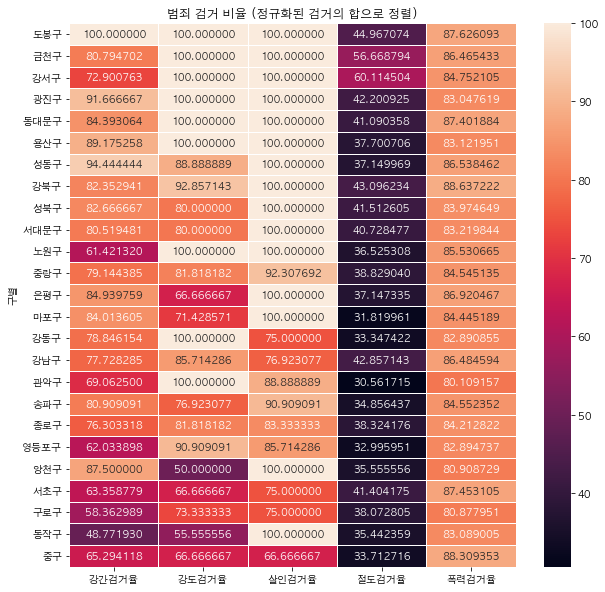

In [85]:
target_col = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
plt.figure(figsize=(10,10))
sns.heatmap(
    crime_anal_norm_sort[target_col],
    annot=True,
    fmt = 'f', # float으로 수치 표시, 안쓰면 지수로 나옴 
    linewidths=0.5
)
plt.title('범죄 검거 비율 (정규화된 검거의 합으로 정렬)')
plt.show()

> 절도검거율이 다른 범죄의 검거율에 비해 매우 저조하다     
> (절도, 폭력은 색이 비슷하니 제외하고 나머지 3개 범죄에 대해) 검거율이 우수한 지역은 도봉, 광진, 성동, 용산이다       

### heatmap을 이용한 범죄 발생률 확인 

In [86]:
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,549898,5221,4.857843,3.697074
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,457042,1879,1.286607,3.700844
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,316750,1265,1.641616,4.069435
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,595703,1617,2.333944,4.177674
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,516662,3985,2.860342,3.686223


In [87]:
# 범죄의 최대값을 100으로 설정하고 검거율 계산하기 
crime_anal_norm['범죄'] = crime_anal_norm['범죄'] / 5


In [88]:
# 범죄율을 기준으로 정렬하기 
crime_anal_norm_sort_crime = crime_anal_norm.sort_values(by='범죄', ascending=False)
crime_anal_norm_sort_crime.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,549898,5221,0.048578,3.697074
영등포구,0.556196,1.000000,1.000000,0.682095,0.745442,62.033898,90.909091,85.714286,32.995951,82.894737,404766,2495,0.039837,3.545480
송파구,0.340058,0.470588,0.750000,0.780768,0.646407,80.909091,76.923077,90.909091,34.856437,84.552352,680883,1586,0.029878,3.681500
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,516662,3985,0.028603,3.686223
마포구,0.553314,0.529412,0.500000,0.535343,0.534859,84.013605,71.428571,100.000000,31.819961,84.445189,386086,1935,0.026529,3.717073


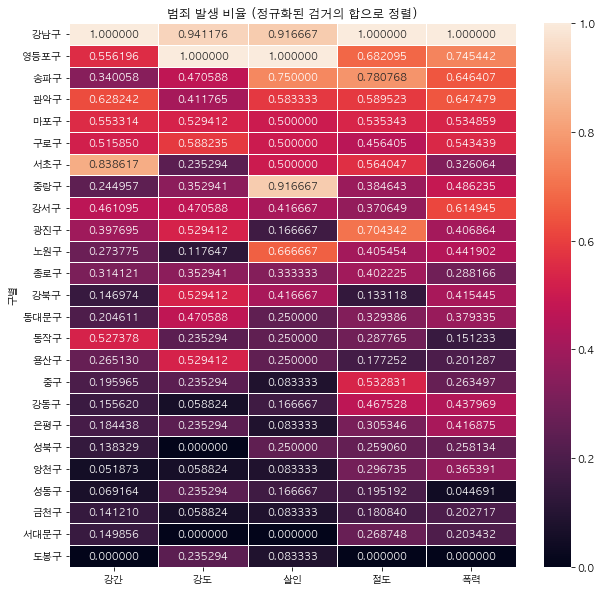

In [90]:
# 범죄율 높은 순으로 지역 정렬해서 각 범죄에 대한 발생(정규화된 검거합)을 히트맵으로 표현 
target_col = ['강간','강도','살인','절도','폭력']
plt.figure(figsize=(10,10))
sns.heatmap(
    crime_anal_norm_sort_crime[target_col],
    annot=True,
    fmt = 'f', # float으로 수치 표시, 안쓰면 지수로 나옴 
    linewidths=0.5
)
plt.title('범죄 발생 비율 (정규화된 검거의 합으로 정렬)')
plt.show()

In [91]:
# 저장 
crime_anal_norm.to_csv("../Data/seoul_crime_nore.csv")

--- 
## 살인 발생 지역 지도 표시 

In [92]:
import json 

In [93]:
# 지역 경계 데이터 불러오기 
geo_path = "../Data/skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding = 'utf-8'))

In [109]:
# 살인 건수를 서울시 지도에 출력하기 
# 지도 만들기 
map = folium.Map(
    location = [37.55, 126.98], 
    tiles = 'Stamen Toner',
    zoom_start=  12,
)
map

In [97]:
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,549898,5221,0.048578,3.697074
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,457042,1879,0.012866,3.700844
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,316750,1265,0.016416,4.069435
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,595703,1617,0.023339,4.177674
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,516662,3985,0.028603,3.686223


In [98]:
#Choropleth로 살인 발생 정도 표시하기 
folium.Choropleth(
    geo_data=geo_str, # 지도 경계 
    data=crime_anal_norm['살인'], # 표시하려는 데이터
    columns=crime_anal_norm.index, # 열지정 
    fill_color='PuRd',
    fill_opacity=0.7,
    line_opacity=0.3,
    threshold_scale = [0.0,0.2,0.3,0.5,0.7,0.8,1.0],
    key_on='feature.properties.name'

).add_to(map)

map

--- 
### 인구대비 범죄율 지도 출력 
- 범죄 / 인구수 * 100000  # 10만명 당 범죄발생 비율


In [100]:
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,549898,5221,0.048578,3.697074
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,457042,1879,0.012866,3.700844
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,316750,1265,0.016416,4.069435
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,595703,1617,0.023339,4.177674
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,516662,3985,0.028603,3.686223


In [101]:
crime_anal_norm['인구대비범죄율'] = crime_anal_norm['범죄'] / crime_anal_norm['인구수'] * 100000 

In [110]:
#Choropleth로 살인 발생 정도 표시하기 
folium.Choropleth(
    geo_data=geo_str, # 지도 경계 
    data=crime_anal_norm['인구대비범죄율'], # 표시하려는 데이터
    #columns=crime_anal_norm.index, # 열지정 
    fill_color='PuRd',
    fill_opacity=0.7,
    line_opacity=0.3,
    #threshold_scale = [0.0,0.2,0.3,0.5,0.7,0.8,1.0], # 빼면 알아서 만듦 
    key_on='feature.properties.name'

).add_to(map)

map